# Important Libraries

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dropout, Dense, Flatten
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import numpy as np

In [7]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Found", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Found 1


# Loading the data and Normalizing
## The data is normalized and dimensions are increased i.e channels in image

In [8]:
mnist = datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
x_train = x_train/255.0
x_test = x_test/255.0

y_train = np.array(y_train).flatten()
y_test = np.array(y_test).flatten()

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Tensorflow's functional API

### We have used functional API to create the model
### Model consists of 3 convolution layers with 32, 64, 128 filters respectively
### Fully connected layer has 128 hidden neurons and 10 output neurons

In [13]:
i = Input(shape = x_train.shape[1:])
o = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
o = Conv2D(64, (3,3), strides = 2, activation = 'relu')(i)
o = Conv2D(128, (3,3), strides = 2, activation = 'relu')(i)
o = Flatten()(o)
o = Dense(128, activation = 'relu')(o)
o = Dropout(0.2)(o)
o = Dense(10, activation = 'softmax')(o)

In [14]:
model = Model(i,o)

In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       1280      
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2769024   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,771,594
Trainable params: 2,771,594
Non-trainable params: 0
___________________________________________________

# ImageDataGenerator
### We use it to avoid overfitting by augmenting the train data i.e rotation, zoom and shift

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range=10,
                            zoom_range=0.2,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            )

In [22]:
batch_size = 32
train_gen = datagen.flow(x_train, y_train, batch_size = batch_size)
steps_per_epoch = x_train.shape[0]//batch_size

# Fitting the model
### We train our model for 15 epochs

In [23]:
r = model.fit(train_gen, validation_data = (x_test, y_test),
             steps_per_epoch = steps_per_epoch, epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 19s 8ms/step - loss: 0.4156 - accuracy: 0.8689 - val_loss: 0.0830 - val_accuracy: 0.9724
Epoch 2/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2053 - accuracy: 0.9367 - val_loss: 0.0586 - val_accuracy: 0.9811
Epoch 3/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1678 - accuracy: 0.9483 - val_loss: 0.0497 - val_accuracy: 0.9846
Epoch 4/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1491 - accuracy: 0.9541 - val_loss: 0.0496 - val_accuracy: 0.9836
Epoch 5/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1291 - accuracy: 0.9605 - val_loss: 0.0401 - val_accuracy: 0.9859
Epoch 6/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1214 - accuracy: 0.9632 - val_loss: 0.0383 - val_accuracy: 0.9868
Epoch 7/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1116 - accuracy: 0.9646 - val_loss: 0.0354 - val_ac

# History plotter function 

In [24]:
def history_plotter(model, subject):
    plt.plot(model.history[subject], label = subject)
    plt.plot(model.history['val_'+subject], label = 'validation '+subject)
    plt.xlabel("Epochs")
    plt.ylabel(subject)
    plt.legend()
    plt.title(subject)

# Plotting the loss

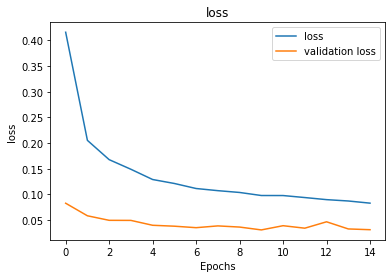

In [25]:
history_plotter(r, 'loss')

# Plotting the accuracy

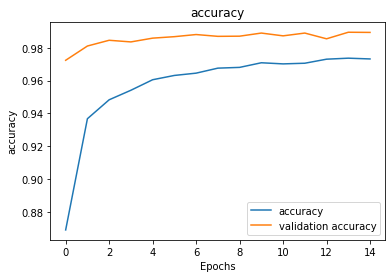

In [27]:
history_plotter(r, 'accuracy')

# Checking Accuracy score
### While training the model the train accuracy becomes 97.32% but in real case it is 99.02 %. This is due to augmentation.
### Test accuracy becomes 98.94%

In [36]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(model.predict(x_train).argmax(axis = 1), y_train)
test_accuracy = accuracy_score(model.predict(x_test).argmax(axis = 1), y_test)

In [37]:
print('Training Accuracy is', train_accuracy)
print('\n')
print('Testing Accuracy is', test_accuracy)

Training Accuracy is 0.9902


Testing Accuracy is 0.9894


# looking at missclassified results

In [48]:
y_pred = model.predict(x_test).argmax(axis = 1)
error = np.where(y_pred != y_test)
choice = np.random.choice(error[0])

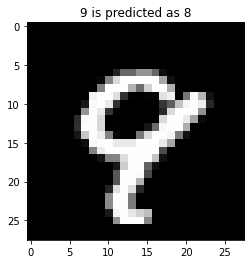

In [51]:
plt.imshow(x_test[choice], cmap = 'gray')
plt.title(f"{y_test[choice]} is predicted as {y_pred[choice]}");